In [1]:
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import CentroidDetection
import matplotlib.pyplot as plt

from tqdm import tqdm as TQ
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('basicPresentationStyle');

In [2]:
%%time
BerlinMOD = pd.read_csv('./output/BerlinMOD.csv')

Wall time: 1.58 s


In [3]:
xScalar, yScalar = [MinMaxScaler(feature_range = (0, 1)) for _ in range(2)]

In [4]:
%%time
BerlinMOD['xStart_Norm'] = xScalar.fit_transform(BerlinMOD['xStart'].values.reshape(-1, 1)).reshape(1, -1)[0]
BerlinMOD['yStart_Norm'] = yScalar.fit_transform(BerlinMOD['yStart'].values.reshape(-1, 1)).reshape(1, -1)[0]

Wall time: 50 ms


In [5]:
%%time
BerlinMOD['UIN'] = BerlinMOD[['MOID', 'TRIPID']].apply(lambda x: f'{x[0]}_#{x[1]}', axis = 1)

Wall time: 21.1 s


In [6]:
BerlinMOD = BerlinMOD[['UIN', 'MOID', 'TRIPID', 'tStart', 'tEnd', 'xStart', 'yStart', 'xEnd', 'yEnd',
    'EuclideanDistance', 'TimeTaken', 'Velocity', 'xStart_Norm', 'yStart_Norm']]

In [7]:
%%time
BerlinMOD['TimeStamp'] = BerlinMOD['tStart'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f').timestamp())

Wall time: 9.67 s


In [8]:
BerlinMOD.sample(5)

,UIN,MOID,TRIPID,tStart,tEnd,xStart,yStart,xEnd,yEnd,EuclideanDistance,TimeTaken,Velocity,xStart_Norm,yStart_Norm,TimeStamp
267032,111_#1388,111,1388,2007-05-28 20:52:56.498,2007-05-28 20:52:58.498,4731.36,5789.98,4722.47,5775.88,1493.435279,2.0,746.717639,0.372336,0.287407,1.180366e+09
108488,48_#595,48,595,2007-05-28 07:28:14.635,2007-05-28 07:28:16.635,5510.00,8709.00,5510.93,8671.67,4497.096658,2.0,2248.548329,0.393047,0.387425,1.180317e+09
18675,8_#95,8,95,2007-05-29 16:38:28.052,2007-05-29 16:38:30.052,12550.50,4343.83,12545.60,4371.18,11583.202270,2.0,5791.601135,0.580314,0.237856,1.180437e+09
240838,98_#1233,98,1233,2007-05-29 17:14:07.412,2007-05-29 17:14:09.412,21163.00,9992.00,21160.50,9984.06,15802.026834,2.0,7901.013417,0.809395,0.431386,1.180439e+09
269171,112_#1401,112,1401,2007-05-28 07:40:38.545,2007-05-28 07:40:40.545,-3116.03,14927.10,-3109.71,14954.20,25531.537061,2.0,12765.768530,0.163607,0.600483,1.180318e+09


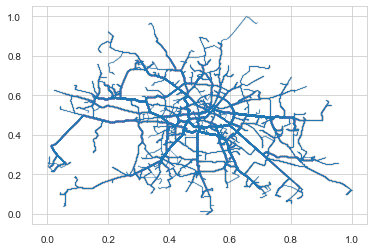

In [9]:
plt.scatter(BerlinMOD.xStart_Norm, BerlinMOD.yStart_Norm, s = 1e-3)
plt.show()

In [10]:
%%time
ukeys, capturedOnArray, LocationPairsArray = CentroidDetection.support._particle(
        dataFrame = BerlinMOD[['UIN', 'TimeStamp', 'xStart_Norm', 'yStart_Norm']], keysName = 'UIN', timeArray = 'TimeStamp', locations = ['xStart_Norm', 'yStart_Norm']
    )

Wall time: 18 s


In [11]:
ParticleList    = []
ErroredParticle = [] # Need Further Analysis on these Items

with warnings.catch_warnings():
    warnings.simplefilter("error", RuntimeWarning)
    
    for idx in TQ(range(ukeys.shape[0]), desc = 'Creating Particle List'):
        try:
            ParticleList.append(CentroidDetection.Particle(UIN = ukeys[idx], TimeArray = capturedOnArray[idx], LocationPairs = LocationPairsArray[idx]))
        except RuntimeWarning as errMsg:
            ErroredParticle.append({'IDX' : idx, 'UIN' : ukeys[idx], 'TimeArray' : capturedOnArray[idx], 'LocationPairs' : LocationPairsArray[idx]})

Creating Particle List: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 1797/1797 [02:47<00:00, 10.74it/s]


In [12]:
neuronCount    = 10
originalNeuron = np.array([[random.uniform(0.0, 1.0), random.uniform(0.0, 1.0)] for _ in range(neuronCount)])
NeuronObjs     = [CentroidDetection.Neuron(neuronLocation = i, radiusValue = 734*8/10, decayMethod = 'fastExponential',
                    decayRate = 0.999) for i in originalNeuron]

LearningRate   = CentroidDetection.MultiplicativeDecay(0.7, 0.9999)

for idx in range(neuronCount):
    print(NeuronObjs[idx].NeuronInfo)

<property-Neuron N-HJV#55:1491687522504> with Current-Radius = 587.2, having fastExponential Decay, Loc. at [0.075, 0.306]
<property-Neuron N-LLP#98:1491687522376> with Current-Radius = 587.2, having fastExponential Decay, Loc. at [0.749, 0.186]
<property-Neuron N-BCJ#51:1491687524296> with Current-Radius = 587.2, having fastExponential Decay, Loc. at [0.557, 0.595]
<property-Neuron N-AZA#56:1491465958408> with Current-Radius = 587.2, having fastExponential Decay, Loc. at [0.162, 0.459]
<property-Neuron N-HAY#56:1491465960008> with Current-Radius = 587.2, having fastExponential Decay, Loc. at [0.265, 0.502]
<property-Neuron N-FCL#16:1491465959560> with Current-Radius = 587.2, having fastExponential Decay, Loc. at [0.278, 0.386]
<property-Neuron N-SFR#25:1491465958984> with Current-Radius = 587.2, having fastExponential Decay, Loc. at [0.517, 0.858]
<property-Neuron N-NDQ#46:1491465960136> with Current-Radius = 587.2, having fastExponential Decay, Loc. at [0.725, 0.99]
<property-Neuron 

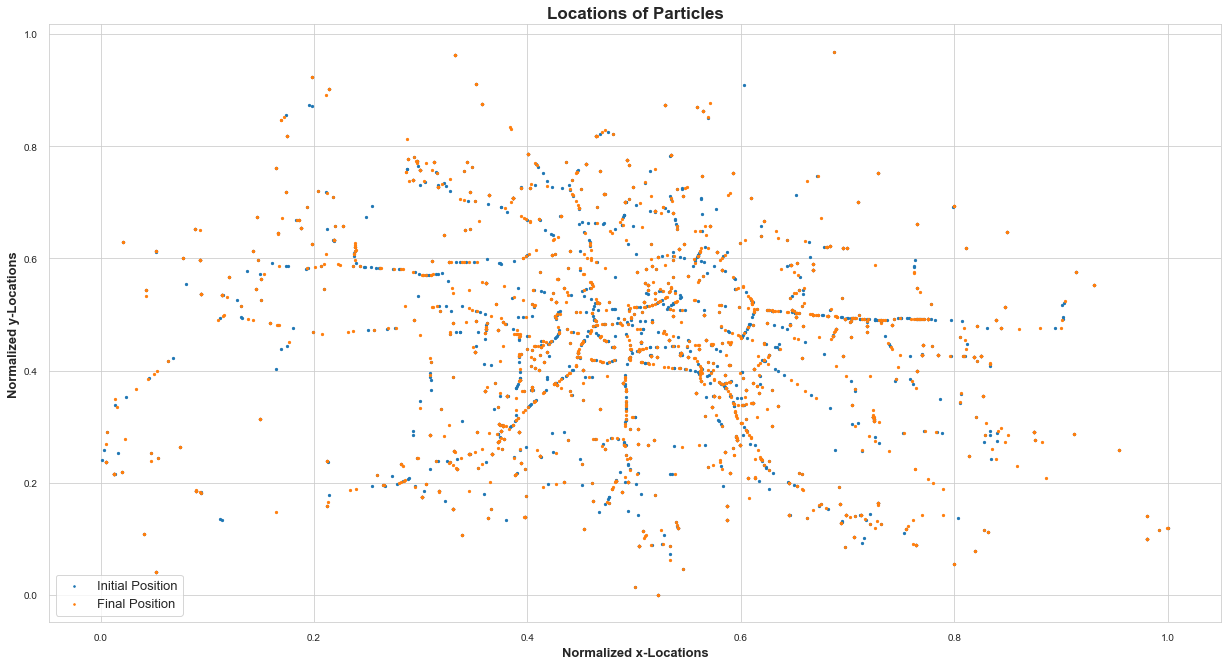

In [13]:
plt.figure(figsize = (21, 11));

particleStartPosition  = [particle.StartPosition for particle in ParticleList]
particleTargetPosition = [particle.TargetPosition for particle in ParticleList]

for posList, legendName in zip([particleStartPosition, particleTargetPosition], ['Initial Position', 'Final Position']):
    x, y = zip(*posList)
    plt.scatter(x, y, marker = 'o', s = 5, label = legendName)
    
plt.legend(loc = 'lower left');

plt.title('Locations of Particles');
plt.xlabel('Normalized x-Locations');
plt.ylabel('Normalized y-Locations');

plt.xticks(np.arange(0, 1.1, 0.2));
plt.yticks(np.arange(0, 1.1, 0.2));

# plt.savefig('./ParticleLocation.png');
plt.show()

In [14]:
def AverageCoverage(ParticlePosition, NeuronObjs, distanceMetric = 'euclidean'):
    '''#TODO'''
    distFunc  = CentroidDetection.support.selectDistanceMetric(distanceMetric)
    neuronLoc = CentroidDetection.support.GroupNeuronLocationallNeuronLocation(NeuronObjs)
    
    proximalDistance = 0
    for particle in ParticlePosition:
        closestNeuronIDX, closestNeuron = CentroidDetection.support.ClosestNeuron(particle, neuronLoc)
        proximalDistance += distFunc(particle, closestNeuron)
        
    return proximalDistance

In [15]:
LearningRate = CentroidDetection.MultiplicativeDecay(0.7, 0.9999)

In [16]:
averageError  = []
LearningTime  = []
LearningRates = []

for ITER in TQ(range(2500), desc = 'KSOFM In-Progress'):
    ParticleLocations = [particle.RandomPosition for particle in ParticleList]
    
    NeuronObjs = CentroidDetection.KSOFM(NeuronObjs, ParticleLocations, LearningRate, neuronCount) # eNode-B is not Implemented       
    
    LearningTime.append(time.time() - startTime)
    LearningRates.append(LearningRate.value)
    
    averageError.append(AverageCoverage(ParticleLocations, NeuronObjs))

KSOFM In-Progress:   0%|                                                                                                                      | 0/2500 [00:00<?, ?it/s]C:\Users\debmalya.pramanik\Desktop\MOOC & Paperworks\Research Papers\Detection of Centroid of Moving Objects\Python - Code Implementations\CentroidDetection\core\PlanningAlgorithms.py:47: UserWarning: #TODO: LearningRate is Not-Copied by Default
  warnings.warn('#TODO: LearningRate is Not-Copied by Default')
KSOFM In-Progress:   0%|                                                                                                                      | 0/2500 [00:00<?, ?it/s]


AttributeError: 'tuple' object has no attribute 'RandomPosition'